In [217]:
#importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})

## Data Cleaning

In [218]:
#reading the loan.csv data
data=pd.read_csv("data/loan.csv",index_col=0)
count=0
total_missing_value_cols=[]
#Cleaning the columns with 100% of missing values
for col in data.columns:
    if data[col].isnull().sum() == 39717:
        print(col,data[col].isnull().count())
        count+=1
        total_missing_value_cols.append(col)

print(count)

mths_since_last_major_derog 39717
annual_inc_joint 39717
dti_joint 39717
verification_status_joint 39717
tot_coll_amt 39717
tot_cur_bal 39717
open_acc_6m 39717
open_il_6m 39717
open_il_12m 39717
open_il_24m 39717
mths_since_rcnt_il 39717
total_bal_il 39717
il_util 39717
open_rv_12m 39717
open_rv_24m 39717
max_bal_bc 39717
all_util 39717
total_rev_hi_lim 39717
inq_fi 39717
total_cu_tl 39717
inq_last_12m 39717
acc_open_past_24mths 39717
avg_cur_bal 39717
bc_open_to_buy 39717
bc_util 39717
mo_sin_old_il_acct 39717
mo_sin_old_rev_tl_op 39717
mo_sin_rcnt_rev_tl_op 39717
mo_sin_rcnt_tl 39717
mort_acc 39717
mths_since_recent_bc 39717
mths_since_recent_bc_dlq 39717
mths_since_recent_inq 39717
mths_since_recent_revol_delinq 39717
num_accts_ever_120_pd 39717
num_actv_bc_tl 39717
num_actv_rev_tl 39717
num_bc_sats 39717
num_bc_tl 39717
num_il_tl 39717
num_op_rev_tl 39717
num_rev_accts 39717
num_rev_tl_bal_gt_0 39717
num_sats 39717
num_tl_120dpd_2m 39717
num_tl_30dpd 39717
num_tl_90g_dpd_24m 39717


We found that there are 54 columns with total missing values so dropping those.

In [219]:
data.shape
data_reformed=data.copy()
data_reformed=data_reformed.drop(total_missing_value_cols,axis=1)

In [220]:
#Finding and dropping the columns with more than 30% of missing values
cols_with_above_30_null_values=[]
for col in data_reformed.columns:
    missing_val_perc=100*(data_reformed[col].isnull().sum()/data_reformed.shape[0])
    if missing_val_perc>30:
        print("{} column with {}% missing values".format(col,missing_val_perc))
        cols_with_above_30_null_values.append(col)

desc column with 32.58050708764509% missing values
mths_since_last_delinq column with 64.66248709620565% missing values
mths_since_last_record column with 92.98537150338646% missing values
next_pymnt_d column with 97.12969257496789% missing values


In [221]:
data_reformed=data_reformed.drop(cols_with_above_30_null_values,axis=1)

In [222]:
data_reformed.shape

(39717, 52)

In [223]:
missing_perc=round(100*(data_reformed.isnull().sum()/data_reformed.shape[0]),3)
missing_perc[missing_perc>0]

emp_title                     6.191
emp_length                    2.707
title                         0.028
revol_util                    0.126
last_pymnt_d                  0.179
last_credit_pull_d            0.005
collections_12_mths_ex_med    0.141
chargeoff_within_12_mths      0.141
pub_rec_bankruptcies          1.755
tax_liens                     0.098
dtype: float64

In [224]:
def print_unique_valuecount(df,col):
    print(f'{col} with {len(df[col].unique())} number of unique values')
cols=["emp_title","emp_length","title","revol_util","last_pymnt_d",
      "last_credit_pull_d","collections_12_mths_ex_med",
      "chargeoff_within_12_mths","pub_rec_bankruptcies","tax_liens"]
for col in cols:
    print_unique_valuecount(data_reformed,col)


emp_title with 28821 number of unique values
emp_length with 12 number of unique values
title with 19616 number of unique values
revol_util with 1090 number of unique values
last_pymnt_d with 102 number of unique values
last_credit_pull_d with 107 number of unique values
collections_12_mths_ex_med with 2 number of unique values
chargeoff_within_12_mths with 2 number of unique values
pub_rec_bankruptcies with 4 number of unique values
tax_liens with 2 number of unique values


We are observing that the columnns namely
acc_now_delinq,
delinq_amnt,
chargeoff_within_12_mths,
initial_list_status,
application_type,
policy_code,
collections_12_mths_ex_med,
pymnt_plan,
tax_liens

are categorical variables with only one unique value which doesn't provide much to the analysis of the loan status both in the case of univariate and bivariate analysis
so we can remove these columns

Also member_id and url variable are total unique values and we can remove them as well


In [225]:
cols_to_be_removed=["acc_now_delinq", "delinq_amnt", "chargeoff_within_12_mths",
                    "initial_list_status", "application_type", "policy_code"
                    , "collections_12_mths_ex_med", "pymnt_plan", "tax_liens","member_id","url"]
data_reformed=data_reformed.drop(cols_to_be_removed,axis=1)
data_reformed.shape

(39717, 41)

In [226]:
data_reformed.to_csv("data/semi_cleaned_loan.csv",encoding="utf-8",index=False)

# Data Analysis and Transformation


In [227]:
cleaned_df=pd.read_csv("data/semi_cleaned_loan.csv")

In [228]:
cleaned_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Deleting the columns which are related to Applicants demographics and 


In [229]:
cleaned_df.tail(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39697,10000,10000,400.0,36 months,10.28%,323.98,C,C1,RoadNarrows Robotics,< 1 year,...,466.52,10000.0,1662.89,0.0,0.0,0.0,Jul-10,328.93,Oct-10,NaN
39698,5000,5000,675.0,36 months,9.01%,159.03,B,B2,Viget Labs,1 year,...,772.88,5000.0,725.02,0.0,0.0,0.0,Jul-10,160.02,Jul-10,NaN
39699,5100,5100,575.0,36 months,8.38%,160.72,A,A5,Northwestern School Corporation,4 years,...,651.56,5100.0,679.03,0.0,0.0,0.0,Apr-10,638.15,Jun-07,NaN
39700,5400,5400,200.0,36 months,7.75%,168.60,A,A3,NaN,< 1 year,...,224.80,5400.0,669.34,0.0,0.0,0.0,Jul-10,169.09,Dec-13,NaN
39701,5300,5300,600.0,36 months,8.38%,167.02,A,A5,Peerless Pump Company,7 years,...,680.67,5300.0,712.56,0.0,0.0,0.0,Jul-10,170.05,Jul-10,NaN
39702,5000,5000,850.0,36 months,11.22%,164.23,C,C4,Self-employed,1 year,...,1005.05,5000.0,912.05,0.0,0.0,0.0,Jul-10,166.25,Oct-12,NaN
39703,3000,3000,2550.0,36 months,10.28%,97.20,C,C1,Oracle,2 years,...,2974.03,3000.0,498.86,0.0,0.0,0.0,Jul-10,98.49,Feb-13,NaN
39704,3000,3000,950.0,36 months,8.70%,94.98,B,B1,NaN,< 1 year,...,1082.73,3000.0,419.14,0.0,0.0,0.0,Jul-10,97.45,Jul-10,NaN
39705,5000,5000,250.0,36 months,7.43%,155.38,A,A2,MetraTech,8 years,...,279.69,5000.0,593.63,0.0,0.0,0.0,Jul-10,157.02,Jun-10,NaN
39706,5000,5000,150.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,169.38,5000.0,645.96,0.0,0.0,0.0,Jul-10,157.31,Jun-07,NaN


In [230]:
cleaned_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Deleting the Applicants customer behaviout variables

In [231]:
cols_cust_behaviour=["open_acc","pub_rec","revol_util",
                     "total_acc","out_prncp","out_prncp_inv",
                     "out_prncp_inv","total_pymnt","total_pymnt_inv",
                     "total_rec_int","total_rec_late_fee",
                     "recoveries","collection_recovery_fee","last_pymnt_d",
                     "last_pymnt_amnt","last_credit_pull_d","inq_last_6mths","delinq_2yrs"]
cleaned_df=cleaned_df.drop(cols_cust_behaviour,axis=1)

In [232]:
cleaned_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,revol_bal,total_rec_prncp,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,Fully Paid,credit_card,Computer,860xx,AZ,27.65,Jan-85,13648,5000.00,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Charged Off,car,bike,309xx,GA,1.00,Apr-99,1687,456.46,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,Fully Paid,small_business,real estate business,606xx,IL,8.72,Nov-01,2956,2400.00,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Fully Paid,other,personel,917xx,CA,20.00,Feb-96,5598,10000.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,Current,other,Personal,972xx,OR,17.94,Jan-96,27783,2475.94,0.0


In [233]:
total = cleaned_df.isnull().sum().sort_values(ascending=False)
percent = (cleaned_df.isnull().sum()/cleaned_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
title,11,0.000277
issue_d,0,0.000000
total_rec_prncp,0,0.000000
revol_bal,0,0.000000
earliest_cr_line,0,0.000000
dti,0,0.000000
addr_state,0,0.000000


In [234]:
cleaned_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [235]:
cleaned_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [236]:
cleaned_df.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [237]:
cleaned_df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
revol_bal                  0
total_rec_prncp            0
pub_rec_bankruptcies     697
dtype: int64

We are assuming that the missing emp_title data is self-employed persons

we can fill the missing tilte as None

we can fill the emp_length with the median value

we can fill the pub_rec_bankruptcies with median value


In [238]:
cleaned_df.emp_length.fillna("None",inplace=True)
cleaned_df.emp_title.fillna("self-employed",inplace=True)
cleaned_df.pub_rec_bankruptcies.fillna(0.0,inplace=True)
cleaned_df.title.fillna("None",inplace=True)

In [239]:
cleaned_df.isnull().sum()
cleaned_loan_df=cleaned_df.copy()

Since Our Analysis is based on the loan_status category we are ignoring the datas where the loan repaying process is going on

In [240]:

cleaned_loan_df=cleaned_loan_df[~(cleaned_loan_df["loan_status"]=="Current")]

cleaned_loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

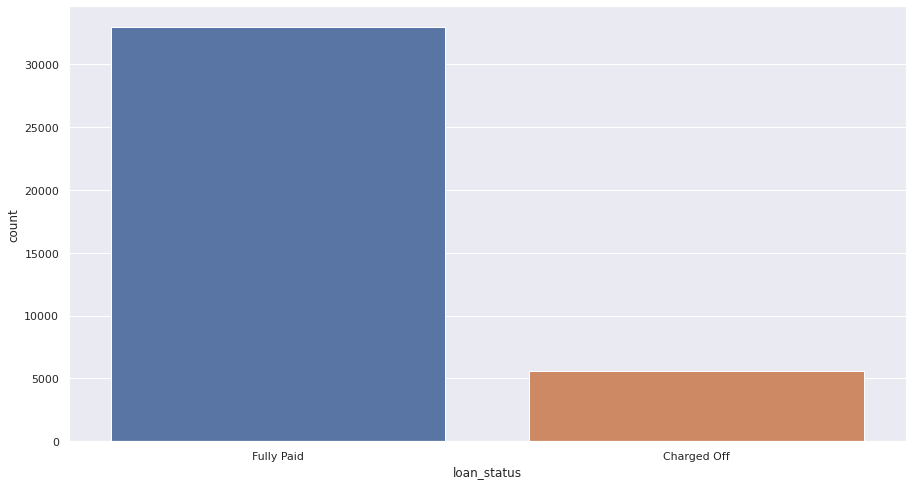

In [241]:
#BarPlot against the count of the target variable
#loan_amnt,int_rate,term,grade,sub_grade,annual_income,purpose,DTI,emp_length,loan_date(mon),home_ownership,verification_stat

sns.countplot(data=cleaned_loan_df, x="loan_status")


### We notice that the charged off value for the loans is approximately about 14% of the total data.


In [242]:
#converting the loan_status to boolean vars for better analysis
cleaned_loan_df["loan_status"]=cleaned_loan_df["loan_status"].apply(lambda x: 0 if x=="Fully Paid" else 1)


<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

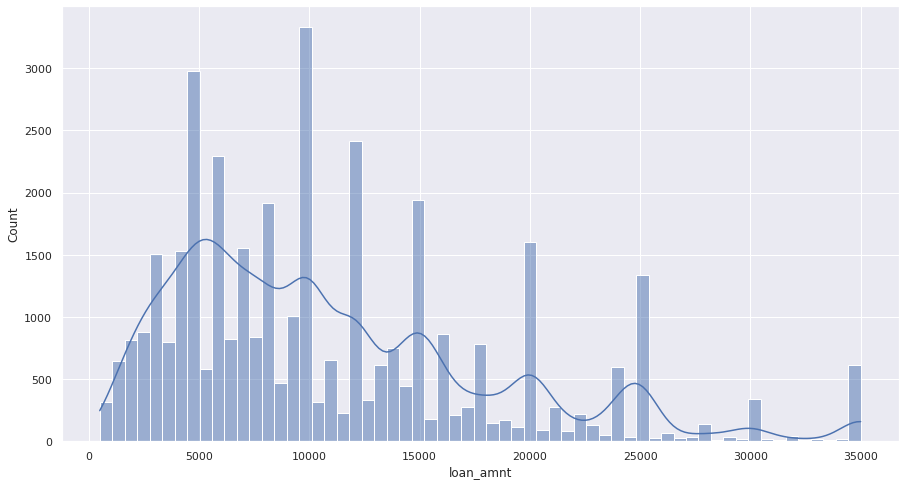

In [243]:
sns.histplot(data=cleaned_loan_df,x="loan_amnt",kde=True)

In [244]:
cleaned_loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

upper bound of the loan amount is 29.55k

In [245]:
cleaned_loan_df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
revol_bal               0
total_rec_prncp         0
pub_rec_bankruptcies    0
dtype: int64

In [246]:
cleaned_loan_df.issue_d.head(20)

0     Dec-11
1     Dec-11
2     Dec-11
3     Dec-11
5     Dec-11
6     Dec-11
7     Dec-11
8     Dec-11
9     Dec-11
10    Dec-11
11    Dec-11
12    Dec-11
13    Dec-11
14    Dec-11
15    Dec-11
16    Dec-11
17    Dec-11
18    Dec-11
19    Dec-11
20    Dec-11
Name: issue_d, dtype: object

Creating derived categorical columns against the DTI column,issue date of loan, loan amount, 


In [247]:
#Creating column issue_month from the issue_d column
cleaned_loan_df["issue_month"]=cleaned_loan_df["issue_d"].apply(lambda x: x.split("-")[0])

In [248]:
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,title,zip_code,addr_state,dti,earliest_cr_line,revol_bal,total_rec_prncp,pub_rec_bankruptcies,issue_month
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,self-employed,10+ years,...,credit_card,Computer,860xx,AZ,27.65,Jan-85,13648,5000.00,0.0,Dec
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,car,bike,309xx,GA,1.00,Apr-99,1687,456.46,0.0,Dec
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,self-employed,10+ years,...,small_business,real estate business,606xx,IL,8.72,Nov-01,2956,2400.00,0.0,Dec
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,other,personel,917xx,CA,20.00,Feb-96,5598,10000.00,0.0,Dec
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,Nov-04,7963,5000.00,0.0,Dec


For some of the continuous variables like loan_amnt, int_rate, dti, annual_income, we will create categorical variables for our analysis according to bins with respect to quartile ranges


In [249]:
#transform int_rate column from object type to float
cleaned_loan_df.int_rate.describe()
cleaned_loan_df.int_rate=cleaned_loan_df.int_rate.apply(lambda x : float(x.strip("%")))

In [250]:
cleaned_loan_df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

Creating box plot to identify outliers

<AxesSubplot:xlabel='int_rate'>

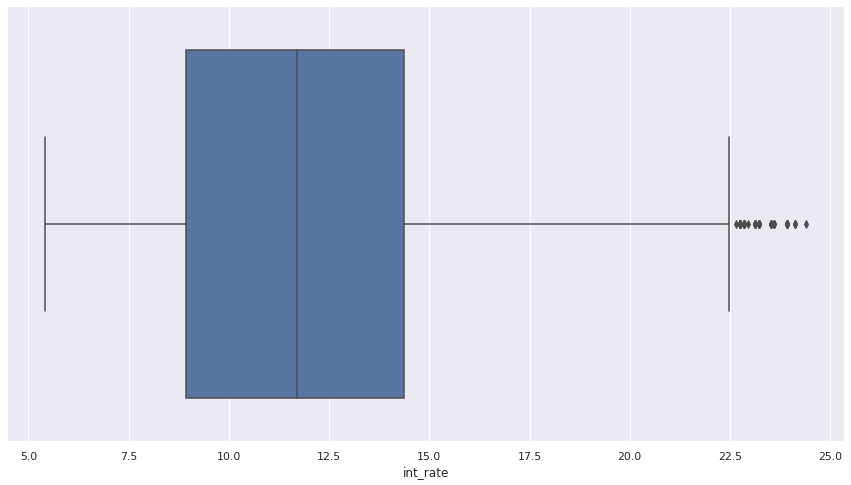

In [251]:
sns.boxplot(data=cleaned_loan_df,x="int_rate")

We observe that the upperbound for the int_rate column is around 21.5

In [252]:
#creating bin out of the int_rate
#removing outliers
cleaned_loan_df=cleaned_loan_df[cleaned_loan_df["int_rate"]<=21.5]
#creating bins of interest rate based on the int_rate columns
cleaned_loan_df["int_rate_cat"]=pd.qcut(cleaned_loan_df.int_rate,q=5,labels=["low","medium-low","medium","medium-high","high"])

In [253]:
#creating categorical column based on loan amount
cleaned_loan_df["loan_amnt_cat"]=pd.qcut(cleaned_loan_df.loan_amnt,q=3,labels=["low","medium","high"])

In [254]:

cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,zip_code,addr_state,dti,earliest_cr_line,revol_bal,total_rec_prncp,pub_rec_bankruptcies,issue_month,int_rate_cat,loan_amnt_cat
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,self-employed,10+ years,...,860xx,AZ,27.65,Jan-85,13648,5000.00,0.0,Dec,medium-low,low
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,309xx,GA,1.00,Apr-99,1687,456.46,0.0,Dec,high,low
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,self-employed,10+ years,...,606xx,IL,8.72,Nov-01,2956,2400.00,0.0,Dec,high,low
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,917xx,CA,20.00,Feb-96,5598,10000.00,0.0,Dec,medium-high,medium
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,852xx,AZ,11.20,Nov-04,7963,5000.00,0.0,Dec,low,low


In [255]:
cleaned_loan_df.dti.describe()

count    38341.000000
mean        13.266524
std          6.676121
min          0.000000
25%          8.130000
50%         13.360000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

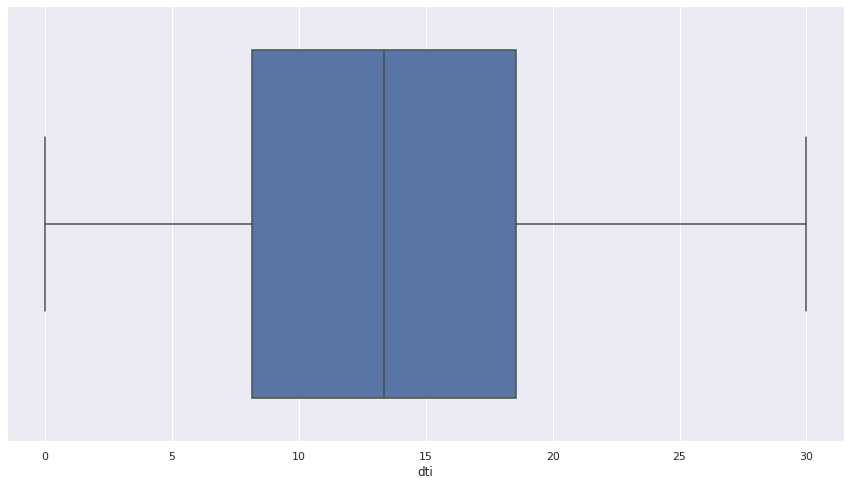

In [256]:
sns.boxplot(data=cleaned_loan_df,x="dti")

<AxesSubplot:xlabel='dti', ylabel='Count'>

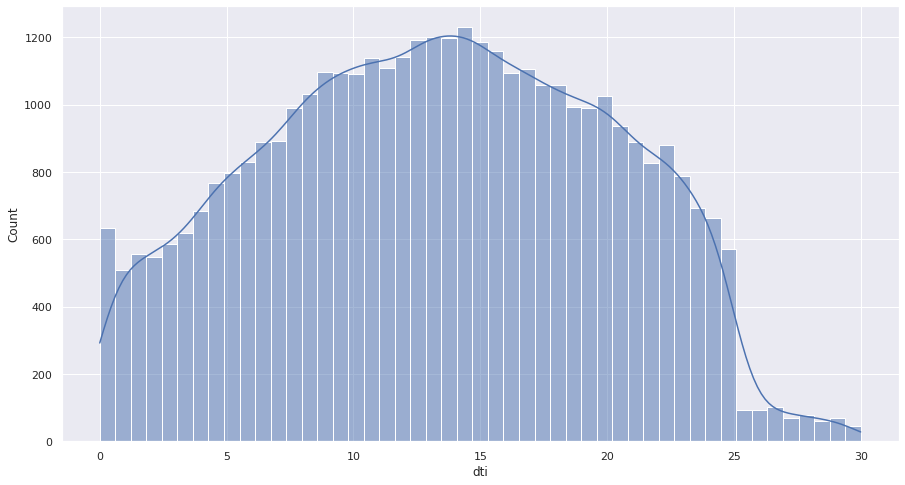

In [257]:
sns.histplot(data=cleaned_loan_df,x="dti",kde=True)

Since the DTI column has no outliers and it is normally distributed we are binning the column to low,high,medium for analysis
lets classify the dti variable as low, medium and high according to quartile ranges


In [258]:
#Dividing the DTI category with respect to bins
cleaned_loan_df["dti_cat"]=pd.qcut(cleaned_loan_df.dti,q=3,labels=["low","medium","high"])

In [259]:
np.quantile(cleaned_loan_df.dti,[0,.3,.6,.9])

array([ 0.  ,  9.23, 15.31, 22.29])

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

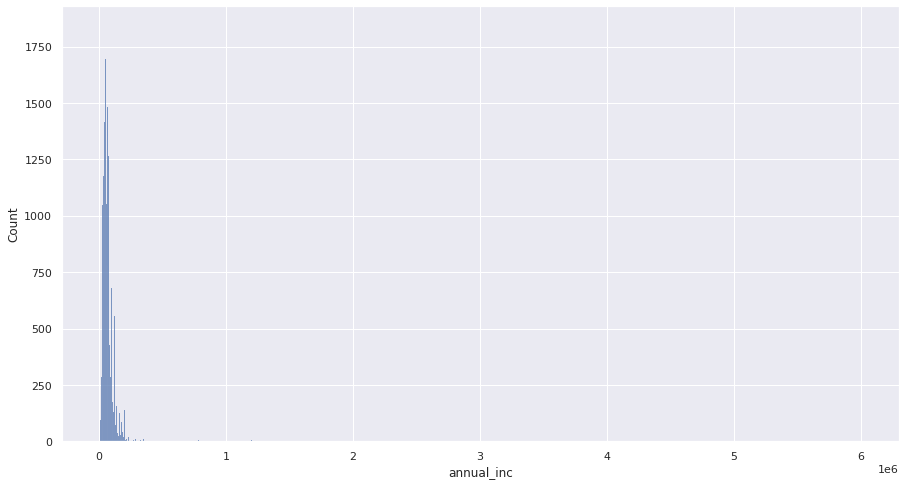

In [260]:
sns.histplot(data=cleaned_df,x="annual_inc")

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

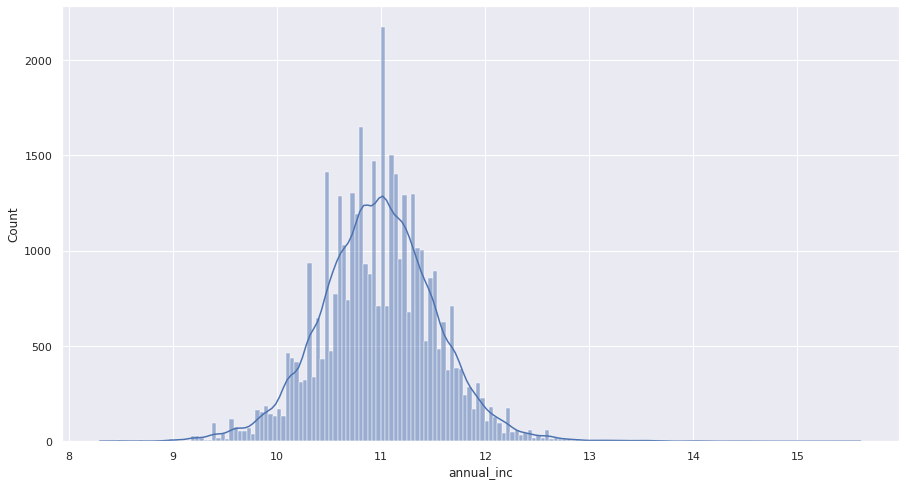

In [261]:
#log normal transformation of the annual_inc column since the distribution is skewed
log_normal_annual_inc=np.log(cleaned_df.annual_inc)
sns.histplot(log_normal_annual_inc,kde=True)

### Creating a log normal distribution from the annual_inc variable for creating better categorical variable


In [262]:
#based on the log_normal distribution creating bin of annual_income
cleaned_loan_df["annual_inc_cat"]=pd.qcut(log_normal_annual_inc,q=3,labels=["low","medium","high"])

In [263]:
np.quantile(log_normal_annual_inc,[0,.3,.6,.9])

array([ 8.29404964, 10.71441777, 11.09504964, 11.66134547])

In [264]:
#Finding the actual bin value of the Annual inc
np.exp(np.quantile(log_normal_annual_inc,[0,.3,.6,.9]))

array([  4000.        ,  45000.        ,  65844.39846721, 116000.        ])

In [265]:
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,earliest_cr_line,revol_bal,total_rec_prncp,pub_rec_bankruptcies,issue_month,int_rate_cat,loan_amnt_cat,dti_cat,annual_inc_cat
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,self-employed,10+ years,...,27.65,Jan-85,13648,5000.00,0.0,Dec,medium-low,low,high,low
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1.00,Apr-99,1687,456.46,0.0,Dec,high,low,low,low
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,self-employed,10+ years,...,8.72,Nov-01,2956,2400.00,0.0,Dec,high,low,low,low
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,20.00,Feb-96,5598,10000.00,0.0,Dec,medium-high,medium,high,medium
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,11.20,Nov-04,7963,5000.00,0.0,Dec,low,low,medium,low


In [266]:
cleaned_loan_df.to_csv("data\cleaned_loan.csv",encoding="utf-8",index=False)

### After doing the transformation we saved the transformed data as cleaned_loan.csv

In [267]:
Analysis_data=pd.read_csv("data\cleaned_loan.csv")

# Univariate Analysis based on the target variable

In [268]:
def plot_vs_perc_defaulters(df,xlabel,col):
    category_df = (cleaned_loan_df.groupby([col]).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby([col]).loan_status.count())
    category_df.plot(kind = "bar",xlabel=xlabel,ylabel="% of Defaulters")

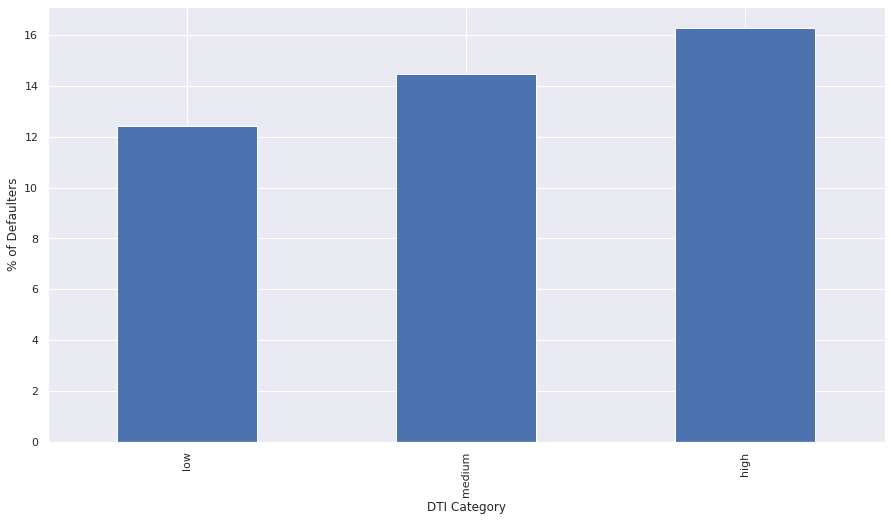

In [269]:
plot_vs_perc_defaulters(Analysis_data,"DTI Category","dti_cat")

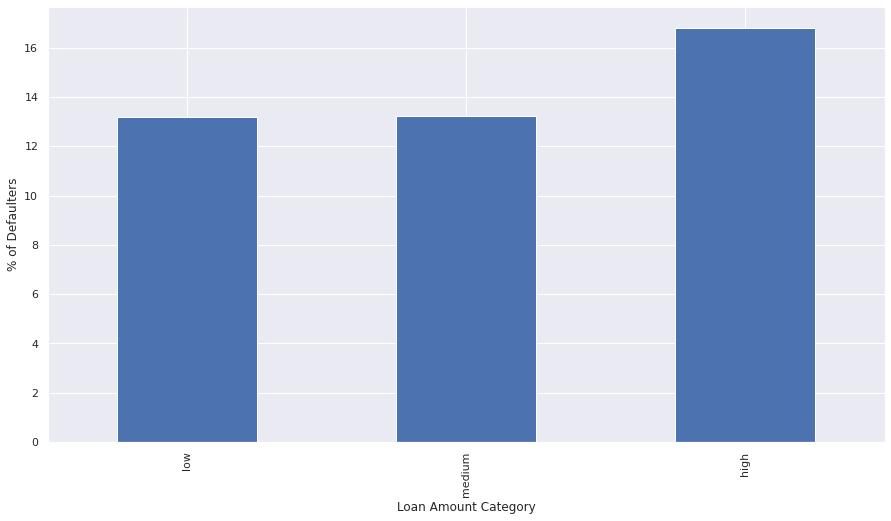

In [270]:
plot_vs_perc_defaulters(Analysis_data,"Loan Amount Category","loan_amnt_cat")

Observation- Higher the debt to income ratio higher the defaulting rate


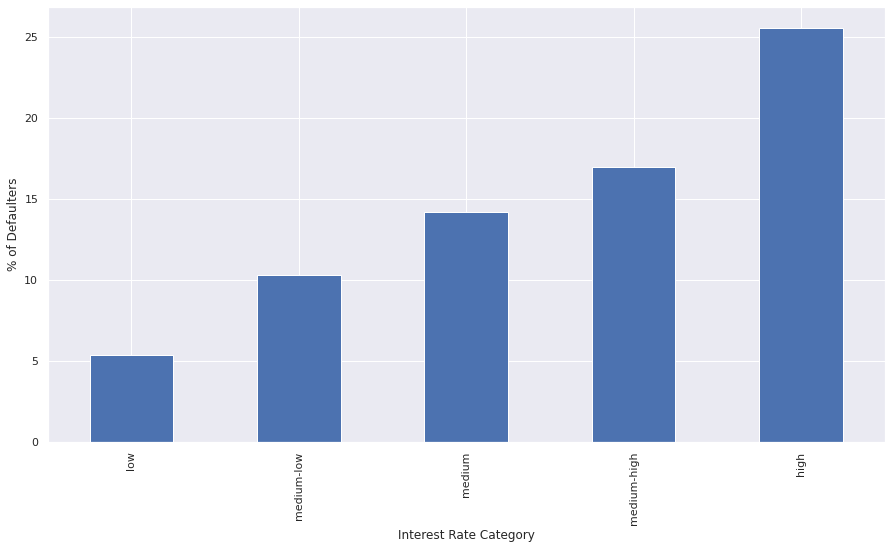

In [271]:

plot_vs_perc_defaulters(Analysis_data,"Interest Rate Category","int_rate_cat")

### Observation higher the interest rate higher the percentage of Defaulters 


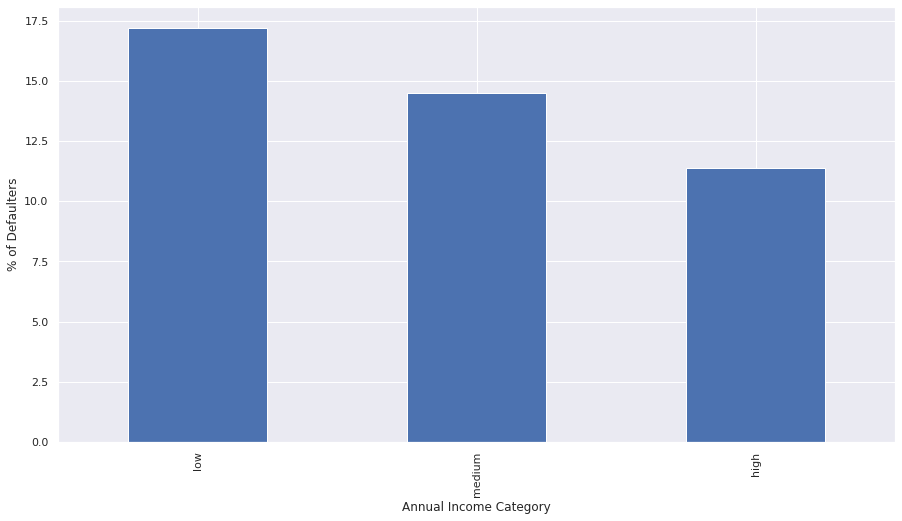

In [272]:
plot_vs_perc_defaulters(Analysis_data,"Annual Income Category","annual_inc_cat")

 We are having an interesting observation here that with the annual income being high the % of defaulters is also High.
 
 One of the important Reason for that with the higher amount of annual income the loan amount applied by the person is also very high.

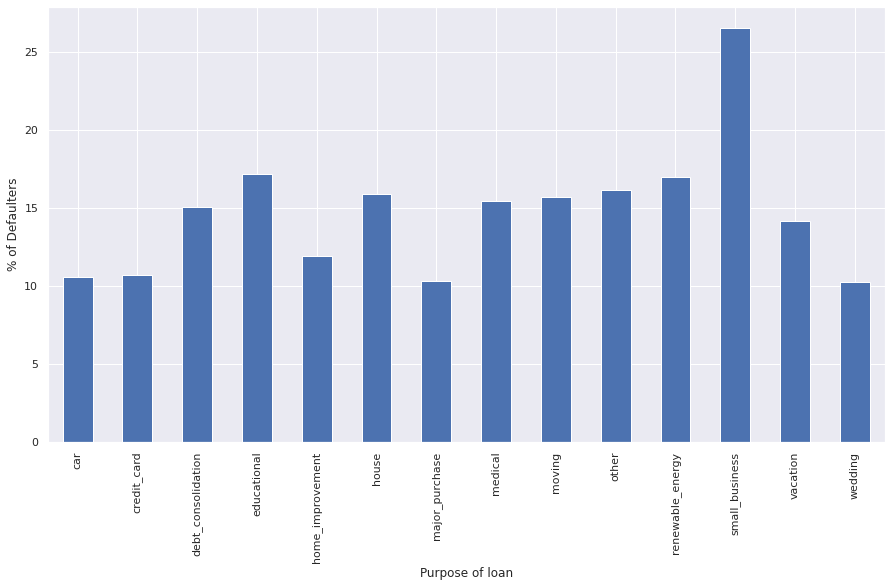

In [273]:

plot_vs_perc_defaulters(Analysis_data,"Purpose of loan","purpose")

observation- for small business category the amount of default rate is much higher than the rest

% of Defaulters based on the issue month


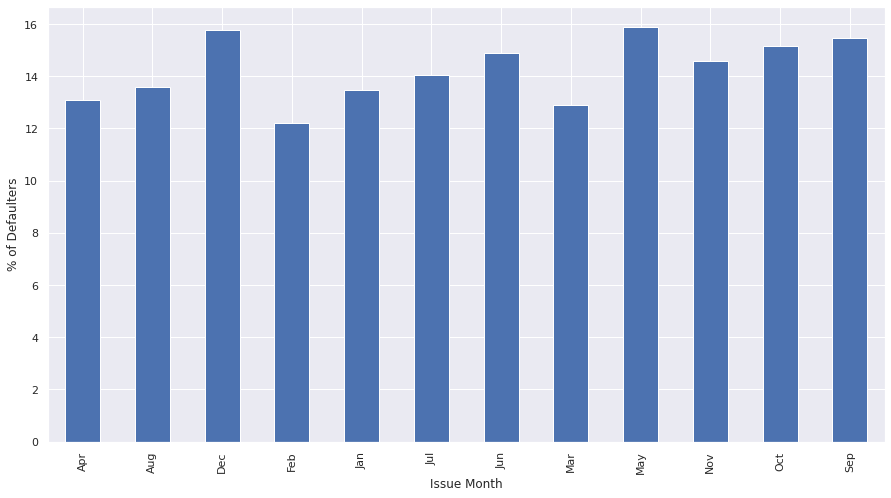

In [274]:
plot_vs_perc_defaulters(Analysis_data,"Issue Month","issue_month")

based on the issue month of the loan we are not getting any kind of strong inferences.

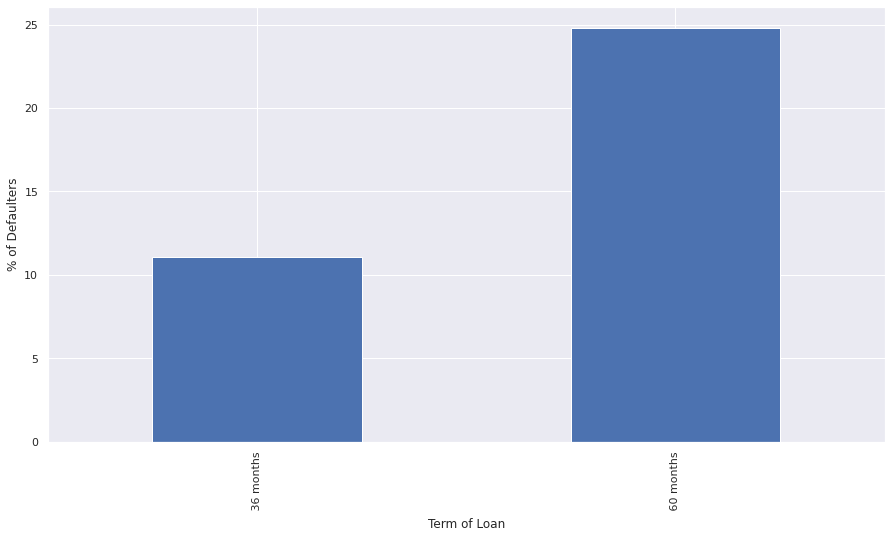

In [275]:
plot_vs_perc_defaulters(Analysis_data,"Term of Loan","term")

We Observe that the higher the Term of Loan higher the default Rate

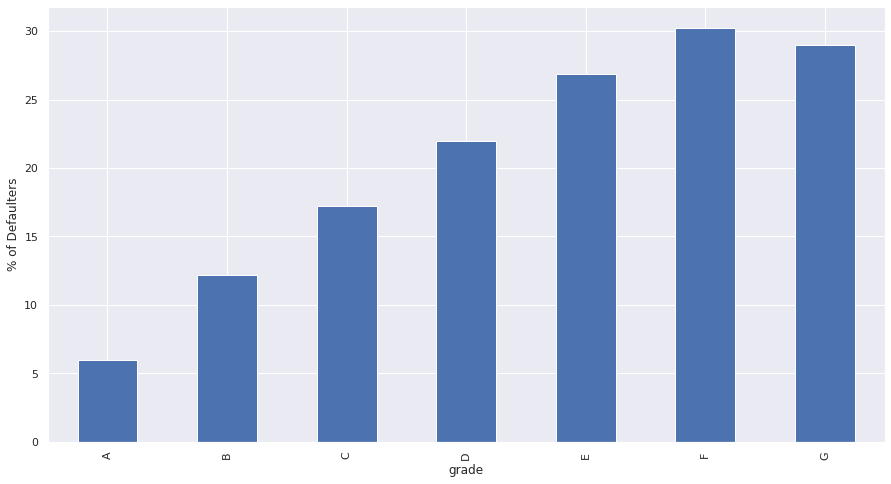

In [276]:
plot_vs_perc_defaulters(Analysis_data,"grade","grade")

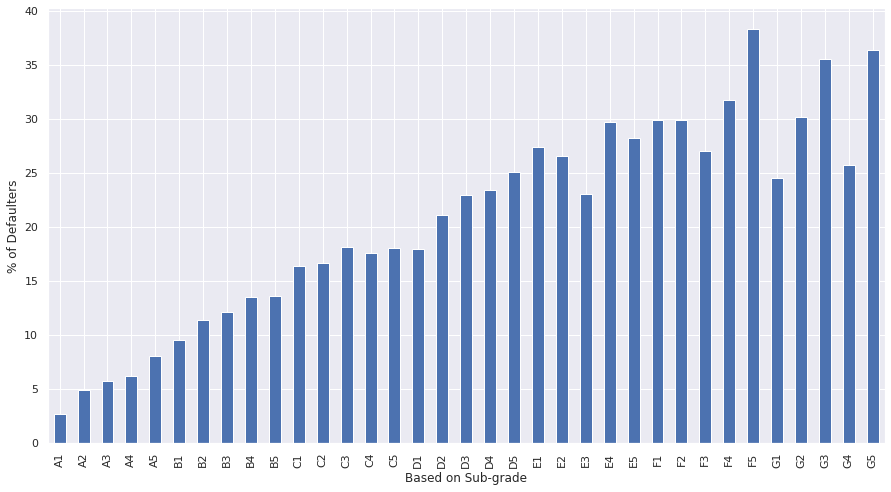

In [277]:
#Plot of sub-grades with respect to the  % of defaulters
plot_vs_perc_defaulters(Analysis_data,"Based on Sub-grade","sub_grade")

As from the previous bar plot we noticed the % of defaulters are high for the F grade now we narrowed down to the F5 sub-grade.

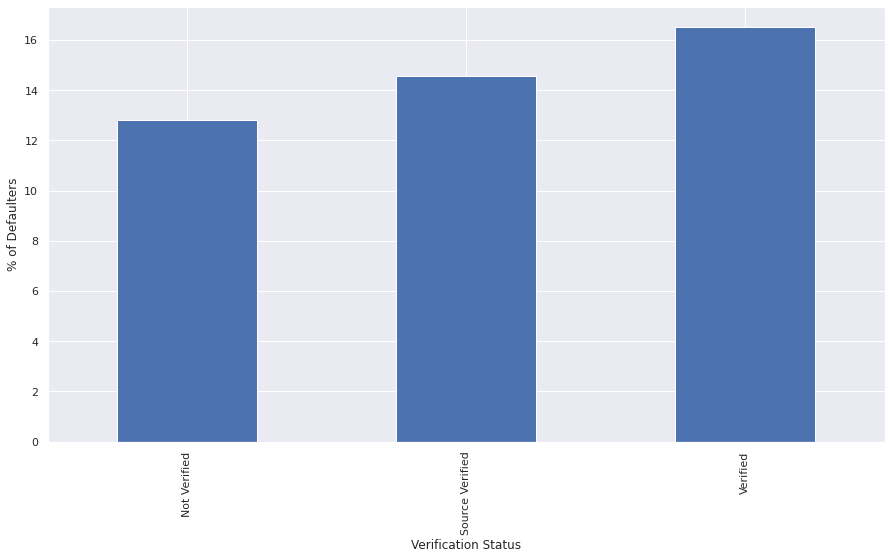

In [278]:
plot_vs_perc_defaulters(Analysis_data,"Verification Status","verification_status")

Verification status gives us an interesting insight. It shows that there is a higher percentage of defaulters amongst the borrowers whose source of income was verified by a 3rd party source or by LC.

This can mean any one of the two things:
1.The verification process has some flaws
2.A verified source of income does not help us to concur that a borrower will less likely default and thus has no impact in risky applicant determination

The later point may be considered to be more likely, as a third party source and LC both making error in validation is highly unlikely.

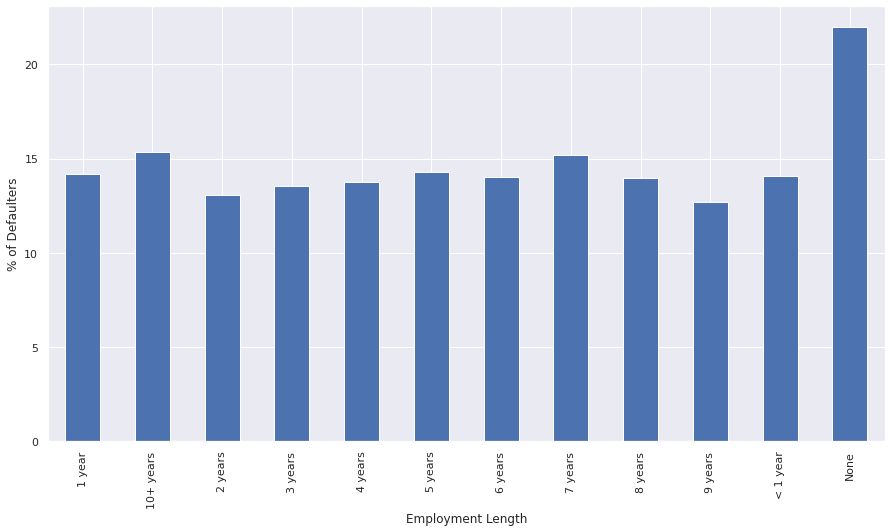

In [279]:

plot_vs_perc_defaulters(Analysis_data,"Employment Length","emp_length")

The Default rate for persons with no employment Length is higher.

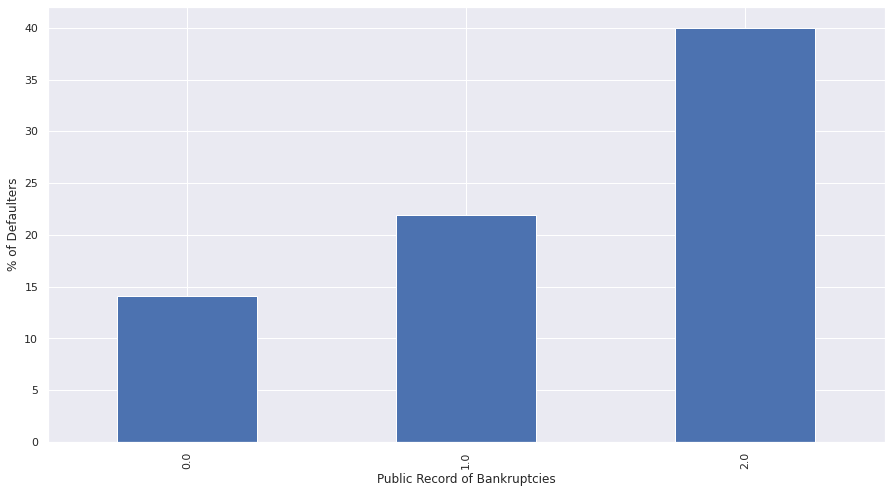

In [280]:
plot_vs_perc_defaulters(Analysis_data,"Public Record of Bankruptcies","pub_rec_bankruptcies")

# Bivariate Analysis


Based on the results and assumptions of the univariate Analysis we will do the Bivariate Analysis

In [281]:
def plot_percdef_vs_cat_var(x, hue ):
    sns.barplot(x=x, y='loan_status', hue = hue , data=Analysis_data)
    plt.title("% of Defaulters with respect to "+x+" and "+hue+"")
    plt.legend()
    plt.xlabel(x, fontsize=16)
    plt.ylabel("% of Defaulters", fontsize=16)
    plt.show()

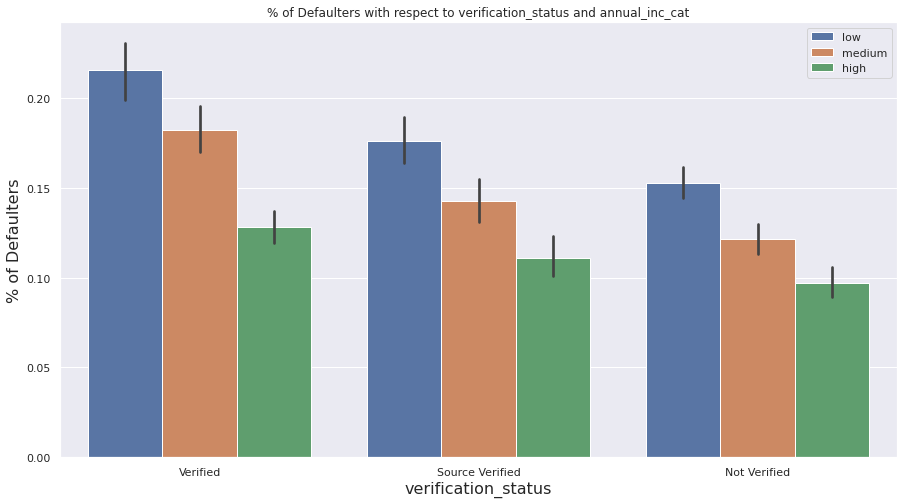

In [282]:
plot_percdef_vs_cat_var("verification_status","annual_inc_cat")

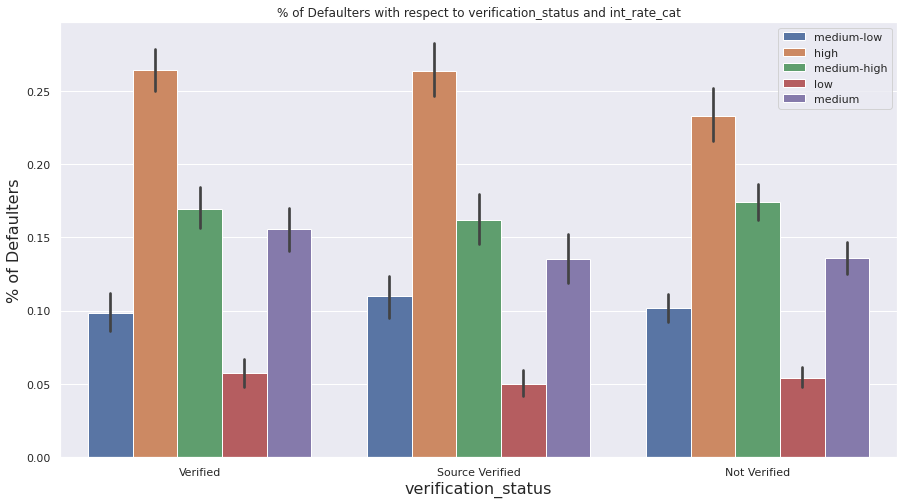

In [283]:
plot_percdef_vs_cat_var("verification_status","int_rate_cat")

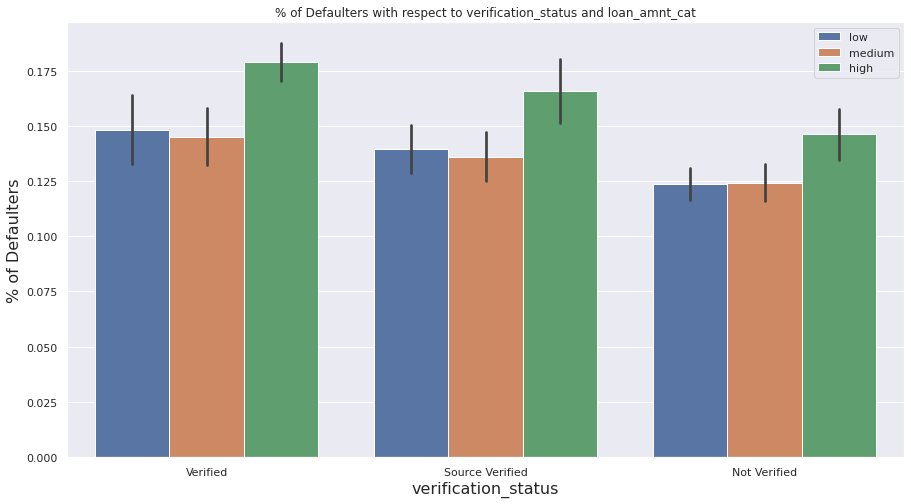

In [284]:
plot_percdef_vs_cat_var("verification_status","loan_amnt_cat")

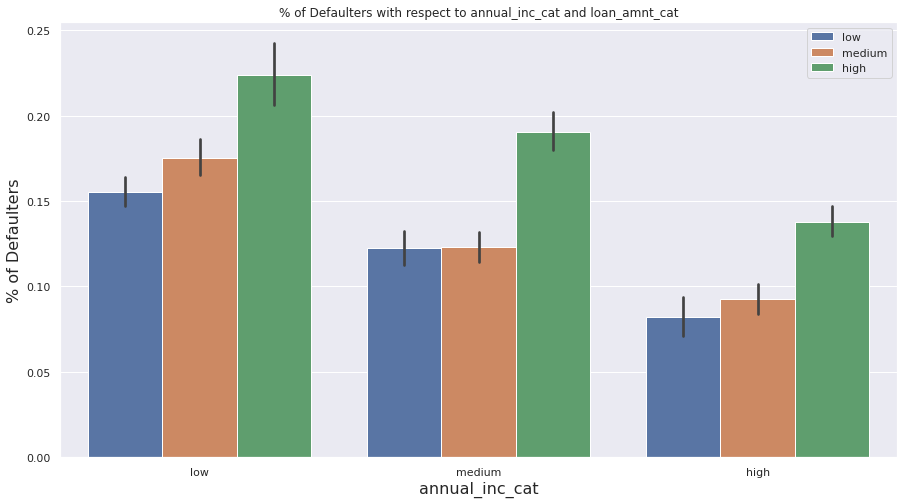

In [285]:
plot_percdef_vs_cat_var("annual_inc_cat","loan_amnt_cat")

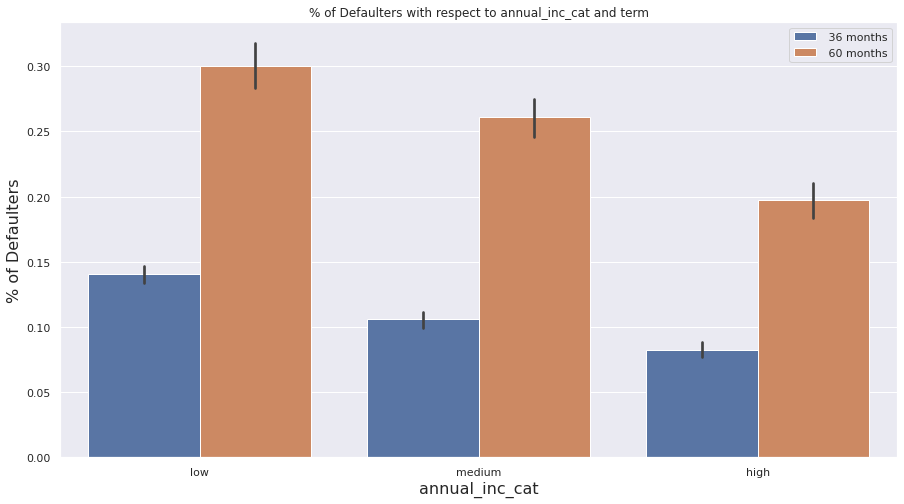

In [286]:
plot_percdef_vs_cat_var("annual_inc_cat","term")

<AxesSubplot:>

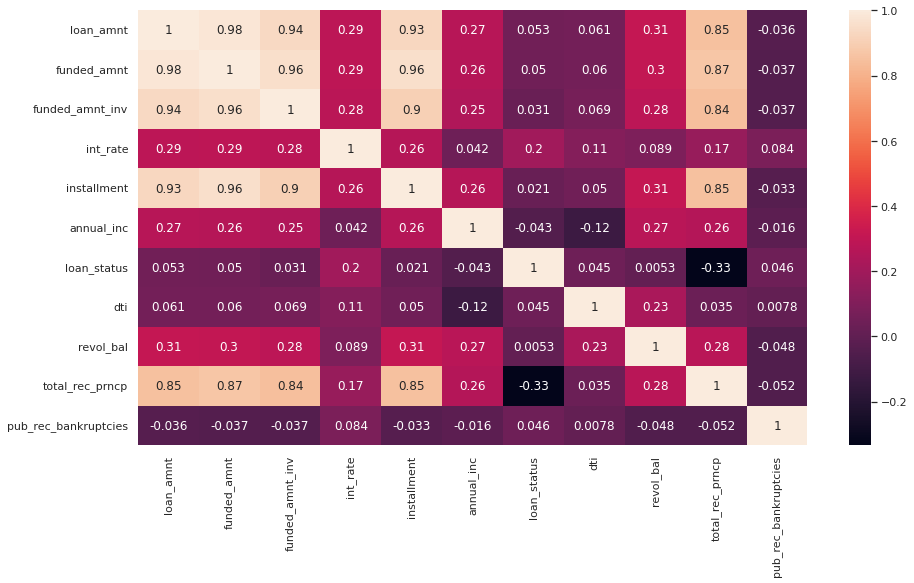

In [288]:

sns.heatmap(Analysis_data.corr(),annot=True)

## Recommendations:
- The Driving metrics for our analysis are, **annual_inc**,**dti**,**verification_status**,**int_rate**,**term**,**grade**,**purpose**,**loan_amnt**.
- Based on the Analysis when the DTI of a borrower is high, the person is more likely to default. So LC must consider a borrower with DTI less than **9.23** which is our start of low dti value.
- Lending Club should consider accepting more loans of grade A and B. It should be cautious of loans falling in grades E,F and G
- If the loan is for purpose of small business there is a high chance of default.
- LC need to consider the number of public bank-ruptcies for a specific borrower higher the number higher the chance of default.
- Lending Club should accept more loans for the term of **36 months** as the % of charged off loans is less and the no. of loan applicants are more. Also the avg fully paid loan amount is increasing over the years and avg charged off lon amount is decreasing over the years.
- Lending Club should be wary of the loans where the purpose is Small Business as the percentage of a loan being charged off is maximum **27.1%**. Accepting loans for the purpose of Weddings,major purchase, car and credit card is highly recommended.
- Lending Club should consider accepting more loans from applicants whose annual income is greater than **116000** as their probablity of charge off is minimum.